### Note: The request has been rejected, therefore I used the files without twitter api 

In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy 
import json
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Read csv file

In [2]:
df_twitter = pd.read_csv('twitter-archive-enhanced-2.csv')
df_twitter.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
df_twitter.shape

(2356, 17)

In [4]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

**Quality issue #1: Change the data type of tweet_id column from int64 to object**

In [5]:
df_twitter['tweet_id'] = df_twitter['tweet_id'].astype('object') 
df_twitter.dtypes


tweet_id                       object
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

**Quality issue: Change the data type of timestamp column from object to datetime**

In [6]:
df_twitter['timestamp'] = pd.to_datetime(df_twitter['timestamp'])  
print(df_twitter.dtypes)

tweet_id                                   object
in_reply_to_status_id                     float64
in_reply_to_user_id                       float64
timestamp                     datetime64[ns, UTC]
source                                     object
text                                       object
retweeted_status_id                       float64
retweeted_status_user_id                  float64
retweeted_status_timestamp                 object
expanded_urls                              object
rating_numerator                            int64
rating_denominator                          int64
name                                       object
doggo                                      object
floofer                                    object
pupper                                     object
puppo                                      object
dtype: object


**Quality issue #2: Remove the < a > tag from column 'source' and keep only the text inside the tag**

In [7]:
from bs4 import BeautifulSoup
df_twitter['source'] = [BeautifulSoup(text).get_text() for text in df_twitter['source'] ]

In [8]:
df_twitter['source'].value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

**Quality issue #3: Replace 'None' from column 'doggo' to ' '**

In [9]:
df_twitter.doggo

0        None
1        None
2        None
3        None
4        None
5        None
6        None
7        None
8        None
9       doggo
10       None
11       None
12       None
13       None
14       None
15       None
16       None
17       None
18       None
19       None
20       None
21       None
22       None
23       None
24       None
25       None
26       None
27       None
28       None
29       None
        ...  
2326     None
2327     None
2328     None
2329     None
2330     None
2331     None
2332     None
2333     None
2334     None
2335     None
2336     None
2337     None
2338     None
2339     None
2340     None
2341     None
2342     None
2343     None
2344     None
2345     None
2346     None
2347     None
2348     None
2349     None
2350     None
2351     None
2352     None
2353     None
2354     None
2355     None
Name: doggo, Length: 2356, dtype: object

In [10]:
df_twitter.doggo= df_twitter.doggo.replace('None','')

In [11]:
df_twitter.doggo

0            
1            
2            
3            
4            
5            
6            
7            
8            
9       doggo
10           
11           
12           
13           
14           
15           
16           
17           
18           
19           
20           
21           
22           
23           
24           
25           
26           
27           
28           
29           
        ...  
2326         
2327         
2328         
2329         
2330         
2331         
2332         
2333         
2334         
2335         
2336         
2337         
2338         
2339         
2340         
2341         
2342         
2343         
2344         
2345         
2346         
2347         
2348         
2349         
2350         
2351         
2352         
2353         
2354         
2355         
Name: doggo, Length: 2356, dtype: object

**Quality issue: Replace 'None' from column 'floofer' to ' '**

In [12]:
df_twitter.floofer= df_twitter.floofer.replace('None','')

**Quality issue: Replace 'None' from column 'pupper' to ' '**

In [13]:
df_twitter.pupper= df_twitter.pupper.replace('None','')

**Quality issue: Replace 'None' from column 'puppo' to ' '**

In [14]:
df_twitter.puppo= df_twitter.puppo.replace('None','')

**Tidness issue #1: Combine columns 'puppo', 'pupper','floofer'and 'doggo' to one column as 'DogStage'**

In [15]:
df_twitter['DogStage'] = df_twitter.doggo + df_twitter.floofer + df_twitter.pupper + df_twitter.puppo

In [16]:
df_twitter.DogStage

0             
1             
2             
3             
4             
5             
6             
7             
8             
9        doggo
10            
11            
12       puppo
13            
14       puppo
15            
16            
17            
18            
19            
20            
21            
22            
23            
24            
25            
26            
27            
28            
29      pupper
         ...  
2326          
2327          
2328          
2329          
2330          
2331          
2332          
2333          
2334          
2335          
2336          
2337          
2338          
2339          
2340          
2341          
2342          
2343          
2344          
2345          
2346          
2347          
2348          
2349          
2350          
2351          
2352          
2353          
2354          
2355          
Name: DogStage, Length: 2356, dtype: object

In [17]:
df_twitter.DogStage.value_counts()

                1976
pupper           245
doggo             83
puppo             29
doggopupper       12
floofer            9
doggopuppo         1
doggofloofer       1
Name: DogStage, dtype: int64

**Quality issue #4: Replace '' with np.nan**

In [18]:
df_twitter.DogStage= df_twitter.DogStage.replace('',np.nan)

In [19]:
df_twitter.DogStage.value_counts()

pupper          245
doggo            83
puppo            29
doggopupper      12
floofer           9
doggopuppo        1
doggofloofer      1
Name: DogStage, dtype: int64

**Quality issue #5: Separate the result of combination of columns**

In [20]:
df_twitter.DogStage= df_twitter.DogStage.replace('doggopupper','doggo,pupper')

In [21]:
df_twitter.DogStage.value_counts()

pupper          245
doggo            83
puppo            29
doggo,pupper     12
floofer           9
doggopuppo        1
doggofloofer      1
Name: DogStage, dtype: int64

In [22]:
df_twitter.DogStage= df_twitter.DogStage.replace('doggopuppo','doggo,puppo')

In [23]:
df_twitter.DogStage= df_twitter.DogStage.replace('doggofloofer','doggo,floofer')

In [24]:
df_twitter.DogStage.value_counts()

pupper           245
doggo             83
puppo             29
doggo,pupper      12
floofer            9
doggo,floofer      1
doggo,puppo        1
Name: DogStage, dtype: int64

**Delete 4 columns**

In [25]:
df_twitter = df_twitter.drop(["doggo", "puppo", "floofer","pupper"], axis=1)

In [26]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns, UTC]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
DogStage                      380 non-null object
dtypes: datetime64[ns, UTC](1), float64(4), int64(2), object(7)
memory usage: 257.8+ KB


**Quality issue #6: Delete 3 columns**

In [27]:
df_twitter.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

In [28]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id                 2356 non-null object
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2356 non-null datetime64[ns, UTC]
source                   2356 non-null object
text                     2356 non-null object
expanded_urls            2297 non-null object
rating_numerator         2356 non-null int64
rating_denominator       2356 non-null int64
name                     2356 non-null object
DogStage                 380 non-null object
dtypes: datetime64[ns, UTC](1), float64(2), int64(2), object(6)
memory usage: 202.5+ KB


**Quality issue #7: Check duplicate**

In [29]:
sum(df_twitter['tweet_id'].duplicated())

0

In [30]:
df_twitter.in_reply_to_user_id.value_counts()

4.196984e+09    47
2.195506e+07     2
7.305050e+17     1
2.916630e+07     1
3.105441e+09     1
2.918590e+08     1
2.792810e+08     1
2.319108e+09     1
1.806710e+08     1
3.058208e+07     1
2.625958e+07     1
1.943518e+08     1
3.589728e+08     1
8.405479e+17     1
2.894131e+09     1
2.143566e+07     1
2.281182e+09     1
1.648776e+07     1
4.717297e+09     1
2.878549e+07     1
1.582854e+09     1
4.670367e+08     1
4.738443e+07     1
1.361572e+07     1
1.584641e+07     1
2.068372e+07     1
1.637468e+07     1
1.185634e+07     1
1.198989e+09     1
1.132119e+08     1
7.759620e+07     1
Name: in_reply_to_user_id, dtype: int64

In [31]:
df_twitter.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
Oliver         11
Tucker         10
Penny          10
Lola           10
Bo              9
Winston         9
the             8
Sadie           8
Bailey          7
Toby            7
Buddy           7
an              7
Daisy           7
Stanley         6
Scout           6
Rusty           6
Jax             6
Oscar           6
Dave            6
Jack            6
Leo             6
Bella           6
Milo            6
Koda            6
George          5
             ... 
Brandonald      1
Pilot           1
Mac             1
Brian           1
Joshwa          1
Gordon          1
Edgar           1
Kingsley        1
Timber          1
Dotsy           1
old             1
Fwed            1
Rover           1
Chase           1
Karll           1
Dante           1
Trigger         1
Bodie           1
Berkeley        1
Roscoe          1
officially      1
Scruffers       1
Richie          1
Leonard         1
Tedrick   

In [32]:
df_twitter.name= df_twitter.name.replace('a',np.nan)
df_twitter.name= df_twitter.name.replace('None',np.nan)
df_twitter.name= df_twitter.name.replace('an',np.nan)
df_twitter.name.value_counts()

Charlie       12
Oliver        11
Cooper        11
Lucy          11
Penny         10
Tucker        10
Lola          10
Winston        9
Bo             9
the            8
Sadie          8
Daisy          7
Buddy          7
Bailey         7
Toby           7
Koda           6
Jax            6
Stanley        6
Scout          6
Jack           6
Rusty          6
Milo           6
Leo            6
Oscar          6
Dave           6
Bella          6
Phil           5
Bentley        5
Chester        5
Gus            5
              ..
Brandonald     1
Pilot          1
Mac            1
Brian          1
Joshwa         1
Gordon         1
Edgar          1
Kingsley       1
Timber         1
Dotsy          1
old            1
Fwed           1
Rover          1
Chase          1
Karll          1
Dante          1
Trigger        1
Bodie          1
Berkeley       1
Roscoe         1
officially     1
Scruffers      1
Richie         1
Leonard        1
Tedrick        1
Pherb          1
Ralphy         1
Striker       

### 2. Read tsv file

In [33]:
df_img = pd.read_csv('image-predictions-3.tsv', sep='\t')
df_img.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [34]:
sum(df_img['tweet_id'].duplicated())

0

In [35]:
df_img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [36]:
df_img['tweet_id'] = df_img['tweet_id'].astype('object') 
df_img.dtypes

tweet_id     object
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

### 3. Read json file

In [37]:
df_tweet_json =pd.read_json('tweet-json1.txt', lines=True)
df_tweet_json.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,0.0,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,NaN,...,0.0,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,NaN,...,0.0,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [38]:
df_tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

In [39]:
df_tweet_json.id

0       892420643555336193
1       892177421306343426
2       891815181378084864
3       891689557279858688
4       891327558926688256
5       891087950875897856
6       890971913173991426
7       890729181411237888
8       890609185150312448
9       890240255349198849
10      890006608113172480
11      889880896479866881
12      889665388333682689
13      889638837579907072
14      889531135344209921
15      889278841981685760
16      888917238123831296
17      888804989199671297
18      888554962724278272
19      888078434458587136
20      887705289381826560
21      887517139158093824
22      887473957103951883
23      887343217045368832
24      887101392804085760
25      886983233522544640
26      886736880519319552
27      886680336477933568
28      886366144734445568
29      886267009285017600
               ...        
2324    666411507551481857
2325    666407126856765440
2326    666396247373291520
2327    666373753744588802
2328    666362758909284353
2329    666353288456101888
2

**Quality issue: Remove the < a > tag from column 'source' and keep only the text inside the tag**

In [40]:
from bs4 import BeautifulSoup
df_tweet_json['source'] = [BeautifulSoup(text).get_text() for text in df_tweet_json['source'] ]

In [41]:
df_tweet_json['source'].value_counts()

Twitter for iPhone     2219
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

In [42]:
df_tweet_json.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,Twitter for iPhone,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6514,False,NaN,Twitter for iPhone,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,0.0,NaN,NaN,NaN,4328,False,NaN,Twitter for iPhone,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,NaN,...,0.0,NaN,NaN,NaN,8964,False,NaN,Twitter for iPhone,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,NaN,...,0.0,NaN,NaN,NaN,9774,False,NaN,Twitter for iPhone,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [43]:
df_tweet_json['id'] = df_tweet_json['id'].astype('object') 
df_tweet_json.dtypes

contributors                            float64
coordinates                             float64
created_at                       datetime64[ns]
display_text_range                       object
entities                                 object
extended_entities                        object
favorite_count                            int64
favorited                                  bool
full_text                                object
geo                                     float64
id                                       object
id_str                                    int64
in_reply_to_screen_name                  object
in_reply_to_status_id                   float64
in_reply_to_status_id_str               float64
in_reply_to_user_id                     float64
in_reply_to_user_id_str                 float64
is_quote_status                            bool
lang                                     object
place                                    object
possibly_sensitive                      

In [44]:
df_tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null object
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 

**Quality issue #8: Display the text range with value range only (removing the bracket and 0)**

In [45]:
df_tweet_json['display_text_range'] = df_tweet_json['display_text_range'].str.get(1)

In [46]:
df_tweet_json.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,85,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,Twitter for iPhone,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,138,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6514,False,NaN,Twitter for iPhone,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,121,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,0.0,NaN,NaN,NaN,4328,False,NaN,Twitter for iPhone,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,79,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,NaN,...,0.0,NaN,NaN,NaN,8964,False,NaN,Twitter for iPhone,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,138,"{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,NaN,...,0.0,NaN,NaN,NaN,9774,False,NaN,Twitter for iPhone,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [47]:
sum(df_tweet_json['id'].duplicated())

0

### **Tidness issue #2: Merge 3 datasets into one dataset**


**a.merge df_twitter and df_img datasets into one dataset**

In [48]:
merge_df = pd.merge(df_twitter, 
                      df_img, 
                      how = 'left', on = ['tweet_id'])
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 22 columns):
tweet_id                 2356 non-null object
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2356 non-null datetime64[ns, UTC]
source                   2356 non-null object
text                     2356 non-null object
expanded_urls            2297 non-null object
rating_numerator         2356 non-null int64
rating_denominator       2356 non-null int64
name                     1549 non-null object
DogStage                 380 non-null object
jpg_url                  2075 non-null object
img_num                  2075 non-null float64
p1                       2075 non-null object
p1_conf                  2075 non-null float64
p1_dog                   2075 non-null object
p2                       2075 non-null object
p2_conf                  2075 non-null float64
p2_dog                   2075 non-null object
p3      

**Rename the id column**

In [49]:
df_tweet_json.rename(columns={'id':'tweet_id'}, inplace=True)
df_tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null int64
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
tweet_id                         2354 non-null object
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

**b.merge df_tweet_json to the merged datasets**

In [50]:
final_merge_df = merge_df.merge(df_tweet_json, on='tweet_id')
final_merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 52 columns):
tweet_id                         2354 non-null object
in_reply_to_status_id_x          78 non-null float64
in_reply_to_user_id_x            78 non-null float64
timestamp                        2354 non-null datetime64[ns, UTC]
source_x                         2354 non-null object
text                             2354 non-null object
expanded_urls                    2295 non-null object
rating_numerator                 2354 non-null int64
rating_denominator               2354 non-null int64
name                             1548 non-null object
DogStage                         379 non-null object
jpg_url                          2073 non-null object
img_num                          2073 non-null float64
p1                               2073 non-null object
p1_conf                          2073 non-null float64
p1_dog                           2073 non-null object
p2                 

In [51]:
final_merge_df.drop(["place", "coordinates", "contributors","geo"],  axis=1, inplace=True)

In [52]:
final_merge_df.head()

,tweet_id,in_reply_to_status_id_x,in_reply_to_user_id_x,timestamp,source_x,text,expanded_urls,rating_numerator,rating_denominator,name,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source_y,truncated,user
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,...,0.0,NaN,NaN,NaN,8853,False,NaN,Twitter for iPhone,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,...,0.0,NaN,NaN,NaN,6514,False,NaN,Twitter for iPhone,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,...,0.0,NaN,NaN,NaN,4328,False,NaN,Twitter for iPhone,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,...,0.0,NaN,NaN,NaN,8964,False,NaN,Twitter for iPhone,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,...,0.0,NaN,NaN,NaN,9774,False,NaN,Twitter for iPhone,False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [53]:
final_merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 48 columns):
tweet_id                         2354 non-null object
in_reply_to_status_id_x          78 non-null float64
in_reply_to_user_id_x            78 non-null float64
timestamp                        2354 non-null datetime64[ns, UTC]
source_x                         2354 non-null object
text                             2354 non-null object
expanded_urls                    2295 non-null object
rating_numerator                 2354 non-null int64
rating_denominator               2354 non-null int64
name                             1548 non-null object
DogStage                         379 non-null object
jpg_url                          2073 non-null object
img_num                          2073 non-null float64
p1                               2073 non-null object
p1_conf                          2073 non-null float64
p1_dog                           2073 non-null object
p2                 

In [54]:
#Store the final DataFrame in a CSV file
final_merge_df.to_csv('twitter_archive_master.csv', 
                 index=False, encoding = 'utf-8')

### Analysis and Visualize

In [55]:
final_merge_df.describe().T

,count,mean,std,min,25%,50%,75%,max
in_reply_to_status_id_x,78.0,7.455079e+17,7.582492e+16,6.658147e+17,6.757419e+17,7.038708e+17,8.257804e+17,8.862664e+17
in_reply_to_user_id_x,78.0,2.014171e+16,1.252797e+17,1.185634e+07,3.086374e+08,4.196984e+09,4.196984e+09,8.405479e+17
rating_numerator,2354.0,1.312702e+01,4.589613e+01,0.000000e+00,1.000000e+01,1.100000e+01,1.200000e+01,1.776000e+03
rating_denominator,2354.0,1.045582e+01,6.748090e+00,0.000000e+00,1.000000e+01,1.000000e+01,1.000000e+01,1.700000e+02
img_num,2073.0,1.203570e+00,5.618561e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00
p1_conf,2073.0,5.945317e-01,2.712345e-01,4.433340e-02,3.640950e-01,5.882300e-01,8.439110e-01,1.000000e+00
p2_conf,2073.0,1.346665e-01,1.006830e-01,1.011300e-08,5.390140e-02,1.186220e-01,1.955730e-01,4.880140e-01
p3_conf,2073.0,6.034005e-02,5.092769e-02,1.740170e-10,1.619920e-02,4.947150e-02,9.193000e-02,2.734190e-01
display_text_range,2354.0,1.112022e+02,2.736441e+01,1.100000e+01,9.300000e+01,1.160000e+02,1.370000e+02,1.650000e+02
favorite_count,2354.0,8.080969e+03,1.181477e+04,0.000000e+00,1.415000e+03,3.603500e+03,1.012225e+04,1.328100e+05


**The mean dog rating for the final dataset is 10.45582.**


**On average 3164.797366 twitter users retweet WeRateDogs original tweet.**

In [56]:
final_merge_df.rating_numerator.value_counts().sort_values()

20        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
26        1
182       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
143       1
24        1
204       1
80        1
121       1
75        2
15        2
0         2
420       2
2         9
1         9
4        17
3        19
6        32
5        37
14       54
7        55
8       102
9       158
13      350
10      461
11      464
12      557
Name: rating_numerator, dtype: int64

**The most dog rating is 12**

In [57]:
final_merge_df.rating_denominator.mean()

10.455819881053525

**The rating denominator allways almost 10**

In [58]:
n=final_merge_df.name.value_counts().sort_values()
n

Nigel         1
Chuck         1
Aubie         1
Vixen         1
Malikai       1
Stuart        1
Hubertson     1
Anna          1
Chesney       1
Batdog        1
Izzy          1
Mimosa        1
Chuq          1
Jed           1
Kallie        1
Hanz          1
Spanky        1
Furzey        1
Venti         1
Skye          1
Grizz         1
Griswold      1
Major         1
Pancake       1
Jangle        1
Cannon        1
Oreo          1
Glacier       1
Harrison      1
Pavlov        1
             ..
Sunny         5
Phil          5
Larry         5
very          5
Koda          6
Jack          6
Bella         6
Rusty         6
Stanley       6
Oscar         6
Scout         6
Jax           6
Dave          6
Leo           6
Milo          6
Bailey        7
Daisy         7
Buddy         7
Toby          7
the           8
Sadie         8
Winston       9
Bo            9
Tucker       10
Penny        10
Lola         10
Cooper       11
Oliver       11
Lucy         11
Charlie      12
Name: name, Length: 954,

**The most dog name is Charlie**

The dog stages mean retweet and favorite counts

**a.Doggo**

In [59]:
#Doggo mean retweet Count
final_merge_df.retweet_count[final_merge_df.DogStage=='doggo'].mean()

7520.253012048192

In [60]:
#Doggo mean favorite count
final_merge_df.favorite_count[final_merge_df.DogStage=='doggo'].mean()

15694.963855421687

**b.floofer**

In [61]:
#floofer mean retweet Count
final_merge_df.retweet_count[final_merge_df.DogStage=='floofer'].mean()

4155.888888888889

In [62]:
#floofer mean favorite count
final_merge_df.favorite_count[final_merge_df.DogStage=='floofer'].mean()

11064.444444444445

**c.pupper**

In [63]:
#pupper mean retweet Count
final_merge_df.retweet_count[final_merge_df.DogStage=='pupper'].mean()

2879.467213114754

In [64]:
#pupper mean favorite count
final_merge_df.favorite_count[final_merge_df.DogStage=='pupper'].mean()

6588.049180327869

**d.puppo**

In [65]:
#puppo mean retweet Count
final_merge_df.retweet_count[final_merge_df.DogStage=='puppo'].mean()

6146.137931034483

In [66]:
#puppo mean favorite count
final_merge_df.favorite_count[final_merge_df.DogStage=='puppo'].mean()

17204.58620689655

In [67]:
k=final_merge_df.source_x.value_counts().sort_values()
k

TweetDeck                11
Twitter Web Client       33
Vine - Make a Scene      91
Twitter for iPhone     2219
Name: source_x, dtype: int64

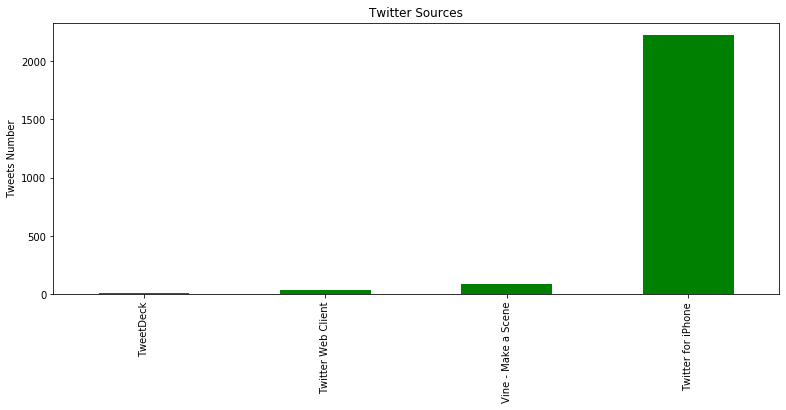

In [68]:
k.plot('bar', figsize=(13,5), title='Twitter Sources' , color='g').set_ylabel("Tweets Number")
plt.savefig('twitter_source')

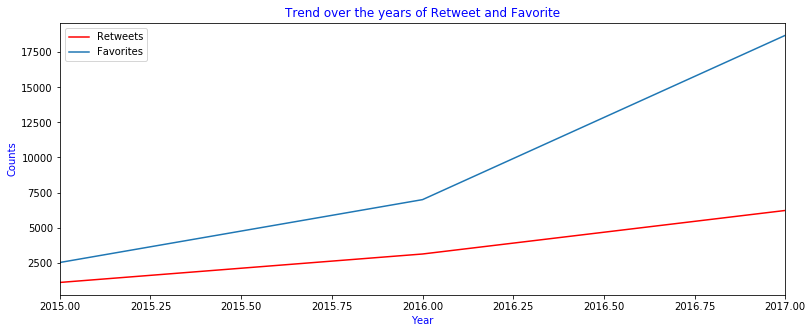

In [69]:
plt.subplots(1, sharex=True,figsize=(13,5))
final_merge_df.retweet_count.groupby(pd.DatetimeIndex(final_merge_df['timestamp']).year).mean().plot('line', color='red')
final_merge_df.favorite_count.groupby(pd.DatetimeIndex(final_merge_df['timestamp']).year).mean().plot('line')
plt.title('Trend over the years of Retweet and Favorite',color='b')
plt.ylabel('Counts' ,color='b')
plt.xlabel('Year',color='b')
plt.legend(('Retweets', 'Favorites'))
plt.savefig('ret_fav')

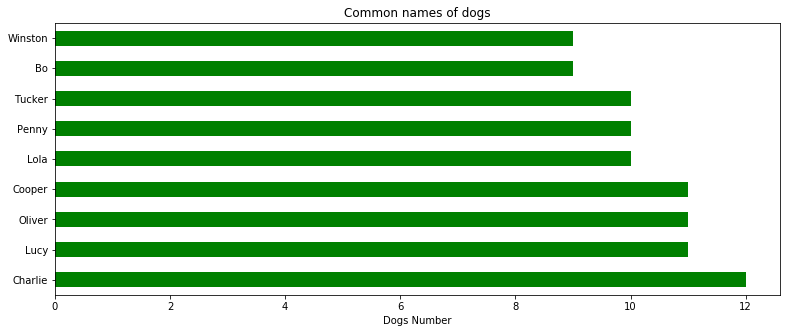

In [70]:
final_merge_df.name.value_counts()[0:9].plot('barh', figsize=(13,5), title='Common names of dogs' , color='g').set_xlabel("Dogs Number")
plt.savefig('dog_names')